# Steps in this work
1. Data Exploration:
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

2. Data Cleaning:
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

3. Data Analysis: 
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

4. Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

5. Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


In [71]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr, zscore, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Read data
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
print("Basic information:")
df.info()

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [8]:
print("Rows and column distribution:")
df.shape

Rows and column distribution:


(148, 6)

In [9]:
print("Columns:")
df.columns

Columns:


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [10]:
print("Statistical description:")
df.describe()

Statistical description:


,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [11]:
print("Missing values:")
df.isnull().sum()

Missing values:


Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [12]:
# Handling Null Values
# numerical column
df['Age'] = df['Age'].replace(0, np.nan)  #Replace the value 0 in age as NaN
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [13]:
# Handling Null Values
# categorical column
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])

In [14]:
# Finding missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Company     0
Age        24
Salary      0
Place       0
Country     0
Gender      0
dtype: int64

In [15]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

In [17]:
unique_values = {col: (df[col].unique(), len(df[col].unique())) for col in df.columns}
print("Unique Values and Their Counts:")
for col, (values, count) in unique_values.items():
    print(f"{col}: {count} unique values\n{values}\n")

Unique Values and Their Counts:
Company: 6 unique values
['TCS' 'Infosys' 'CTS' 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age: 29 unique values
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17. 54.]

Salary: 41 unique values
[5312.46774194 2300.         3000.         4000.         5000.
 6000.         7000.         8000.         9000.         1089.
 1234.         3030.         3045.         3184.         4824.
 5835.         7084.         8943.         8345.         9284.
 9876.         2034.         7654.         2934.         4034.
 5034.         8202.         9024.         4345.         6544.
 6543.         3234.         4324.         5435.         5555.
 8787.         3454.         5654.         5009.         5098.
 3033.        ]

Place: 11 unique values
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Country: 1 unique values
['India']

G

In [18]:
print("\nStatistical Analysis:")
statistical_analysis = df.describe(include='all')
print(statistical_analysis)


Statistical Analysis:
       Company         Age       Salary   Place Country      Gender
count      148  124.000000   148.000000     148     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        61         NaN          NaN      51     148         NaN
mean       NaN   31.959677  5312.467742     NaN     NaN    0.222973
std        NaN    9.034171  2354.305003     NaN     NaN    0.417654
min        NaN   17.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   23.000000  3149.250000     NaN     NaN    0.000000
50%        NaN   33.000000  5312.467742     NaN     NaN    0.000000
75%        NaN   40.000000  7084.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [19]:
# Renaming columns
df.rename(columns={
    'Company': 'Company_Name',
    'Age': 'Employee_Age',
    'Salary': 'Employee_Salary',
    'Place': 'Location',
    'Country': 'Country_Name',
    'Gender': 'Gender(0=Male, 1=Female)'
}, inplace=True)

In [20]:
df.rename(columns={
    'Gender': 'Gender(0=Male, 1=Female)'
}, inplace=True)

In [21]:
print(df.head())

  Company_Name  Employee_Age  Employee_Salary  Location Country_Name  \
0          TCS          20.0      5312.467742   Chennai        India   
1      Infosys          30.0      5312.467742    Mumbai        India   
2          TCS          35.0      2300.000000  Calcutta        India   
3      Infosys          40.0      3000.000000     Delhi        India   
4          TCS          23.0      4000.000000    Mumbai        India   

   Gender(0=Male, 1=Female)  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  


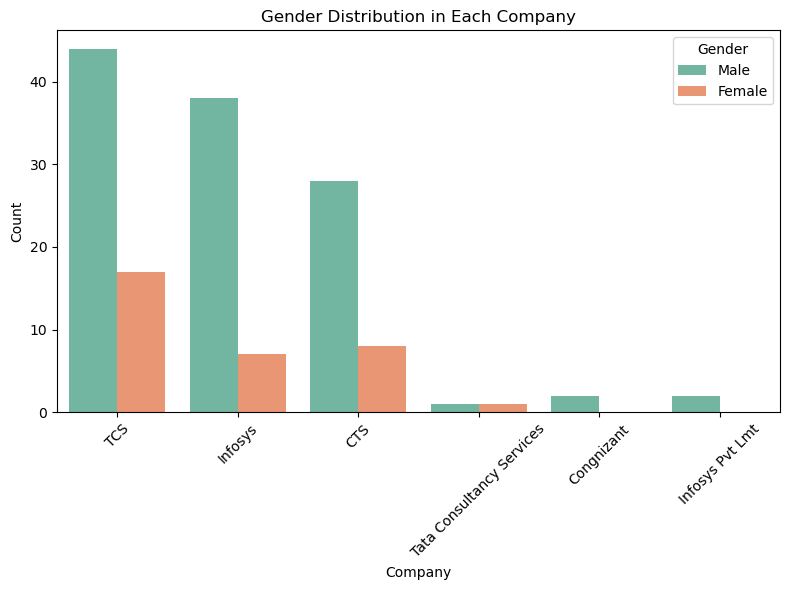

In [22]:
# Visualizations
plt.figure(figsize=(8, 6))
sns.countplot(x='Company_Name', hue='Gender(0=Male, 1=Female)', data=df, palette='Set2')
plt.title('Gender Distribution in Each Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Skew and Kurtosis 
columns=["Employee_Age","Employee_Salary","Gender(0=Male, 1=Female)"]
for i in columns:
    print("Column",i)
    print("Skew:",df[i].skew())
    print("Kurtosis:",df[i].kurtosis())

Column Employee_Age
Skew: 0.26712459210333117
Kurtosis: -0.9985725557794884
Column Employee_Salary
Skew: 0.18496043205850027
Kurtosis: -0.9055215347506671
Column Gender(0=Male, 1=Female)
Skew: 1.3447595326185993
Kurtosis: -0.19443339351495004


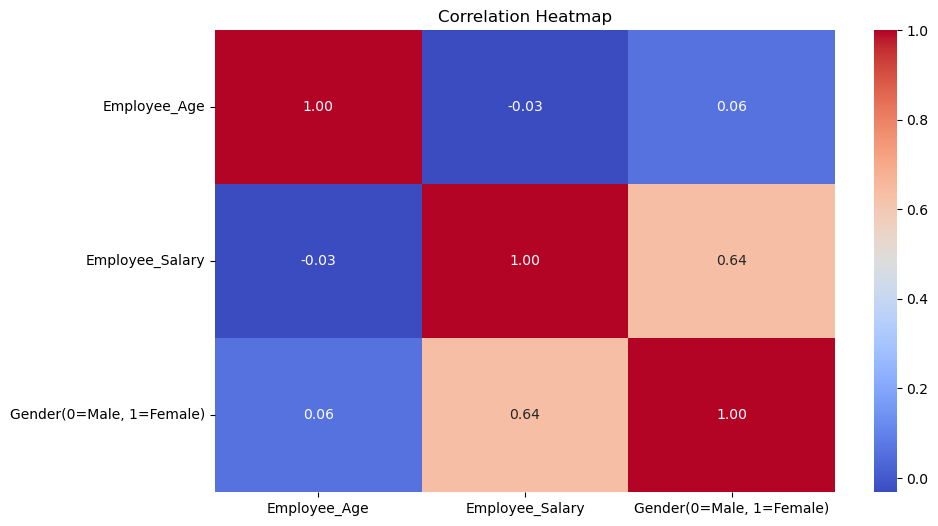

In [24]:
#Correlation heatmap
cols = ['Employee_Age', 'Employee_Salary', 'Gender(0=Male, 1=Female)']
correlation_matrix = df[cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Employee_Age,Employee_Salary columns are fairly symmetrical, whereas column Gender(0=Male, 1=Female) is asymmetrical (skewness value not between -0.5 to 0.5)

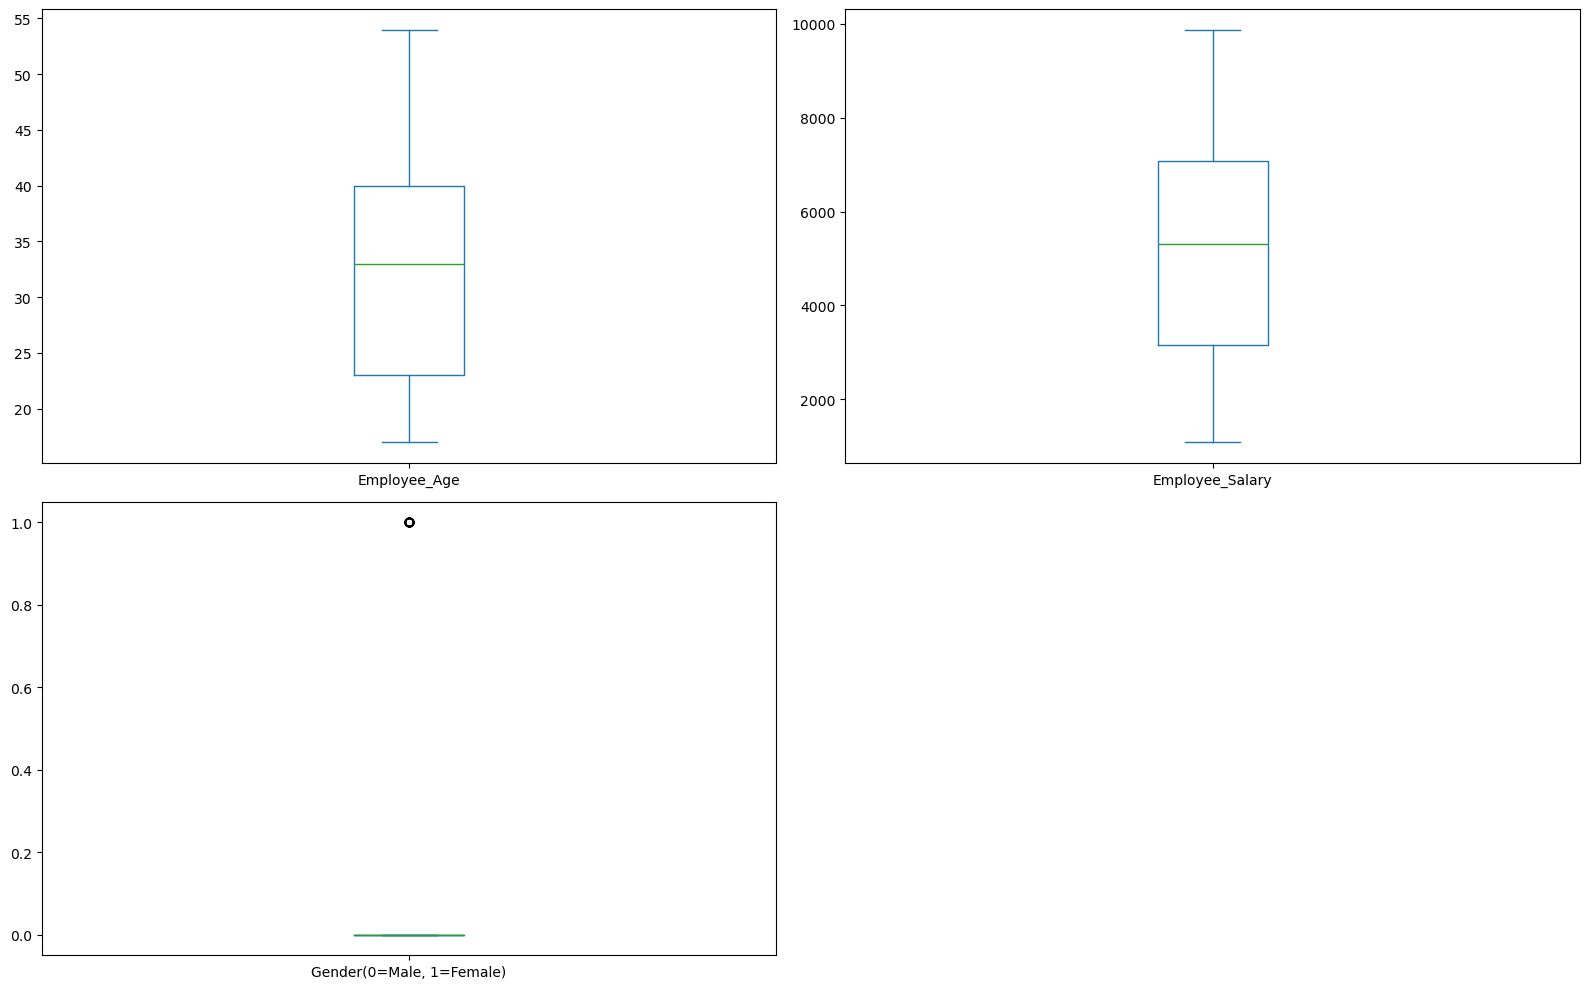

In [26]:
#Boxplot for numerical columns
numerical_cols = ['Employee_Age', 'Employee_Salary', 'Gender(0=Male, 1=Female)']
df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(16, 10))
plt.tight_layout()
plt.show()

Gender(0=Male, 1=Female) column shows very low amount of outliers, so removing them can be skipped.

Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

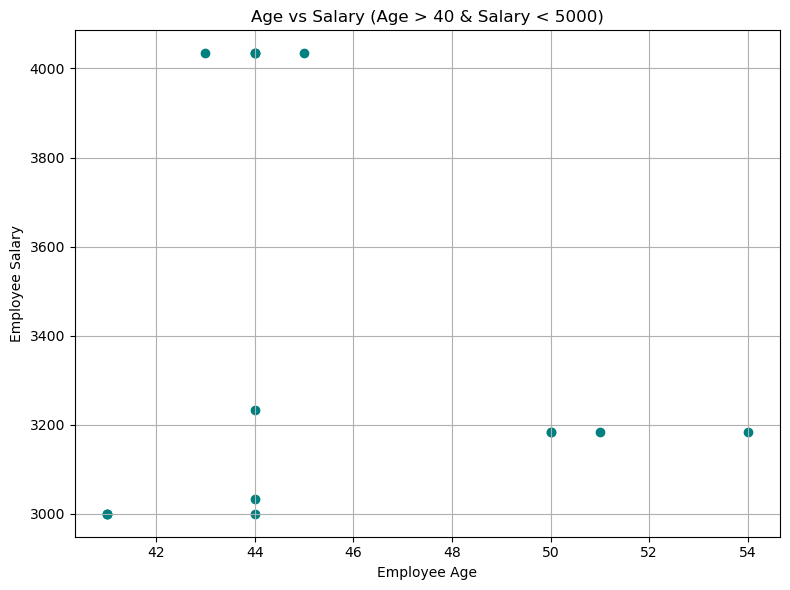

In [29]:
# Filtering the data with age > 40 and salary < 5000
data = df[(df['Employee_Age'] > 40) & (df['Employee_Salary'] < 5000)]
# Plotting age vs salary for the filtered data
plt.figure(figsize=(8, 6))
plt.scatter(data['Employee_Age'], data['Employee_Salary'], color='teal')
plt.title('Age vs Salary (Age > 40 & Salary < 5000)')
plt.xlabel('Employee Age')
plt.ylabel('Employee Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

Most of the employees have salary below 3400 according to the chart

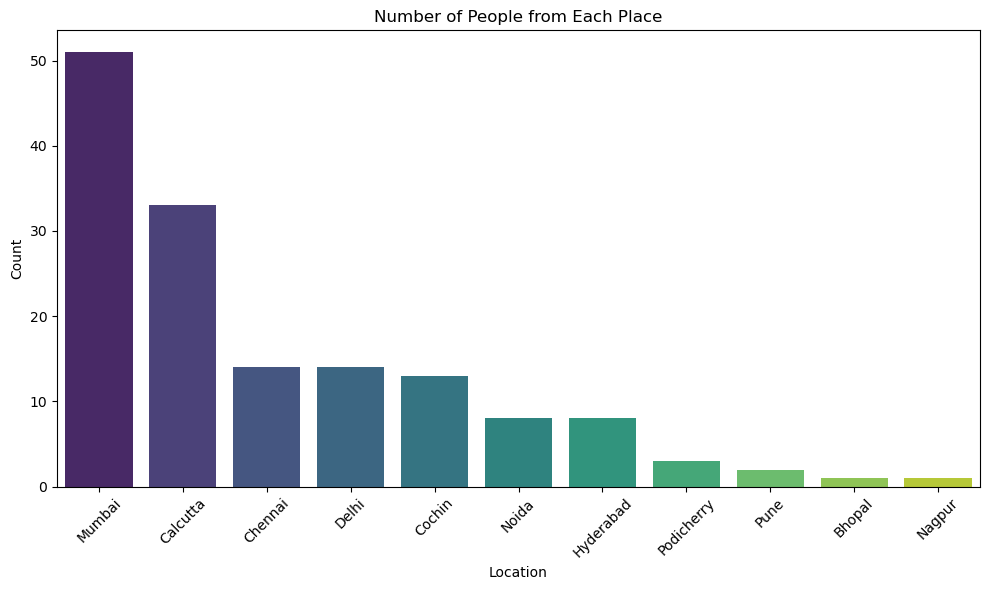

In [31]:
count = df['Location'].value_counts()
# Visual representation of people count from each place
plt.figure(figsize=(10, 6))
sns.barplot(x=count.index, y=count.values, palette='viridis')
plt.title('Number of People from Each Place')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mumbai is the place with highest number of employees whereas Nagpur and Bhopal has lowest number of employees

Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [34]:
# Applying Label Encoding to 'Country Name' column
label_encoder = LabelEncoder()
df['Country_Name'] = label_encoder.fit_transform(df['Country_Name'])
print("Original Data:")
print(df)

Original Data:
    Company_Name  Employee_Age  Employee_Salary  Location  Country_Name  \
0            TCS          20.0      5312.467742   Chennai             0   
1        Infosys          30.0      5312.467742    Mumbai             0   
2            TCS          35.0      2300.000000  Calcutta             0   
3        Infosys          40.0      3000.000000     Delhi             0   
4            TCS          23.0      4000.000000    Mumbai             0   
..           ...           ...              ...       ...           ...   
143          TCS          33.0      9024.000000  Calcutta             0   
144      Infosys          22.0      8787.000000  Calcutta             0   
145      Infosys          44.0      4034.000000     Delhi             0   
146          TCS          33.0      5034.000000    Mumbai             0   
147      Infosys          22.0      8202.000000    Cochin             0   

     Gender(0=Male, 1=Female)  
0                           0  
1                   

In [35]:
# Applying one hot encoding to columns 'Company_Name'and 'Location'
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  #OneHotEncoder instance
categorical_cols = ['Company_Name', 'Location']
encoded_data = one_hot_encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))  # Creating a DataFrame with the encoded columns
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
print(df.head())

   Employee_Age  Employee_Salary  Country_Name  Gender(0=Male, 1=Female)  \
0          20.0      5312.467742             0                         0   
1          30.0      5312.467742             0                         0   
2          35.0      2300.000000             0                         0   
3          40.0      3000.000000             0                         0   
4          23.0      4000.000000             0                         0   

   Company_Name_Congnizant  Company_Name_Infosys  \
0                      0.0                   0.0   
1                      0.0                   1.0   
2                      0.0                   0.0   
3                      0.0                   1.0   
4                      0.0                   0.0   

   Company_Name_Infosys Pvt Lmt  Company_Name_TCS  \
0                           0.0               1.0   
1                           0.0               0.0   
2                           0.0               1.0   
3                 

In [36]:
# 3. Splitting the Data rondomly (80-20% split)
X = df[['Employee_Age', 'Employee_Salary']]  # Features
y = df['Gender(0=Male, 1=Female)']  # Target variable
# Here I assumed the columns ['Employee_Age', 'Employee_Salary'] as features and column ['Gender(0=Male, 1=Female)'] as the target variable.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Data (Features):")
print(X_train)
print("\nTesting Data (Features):")
print(X_test)


Training Data (Features):
     Employee_Age  Employee_Salary
136           NaN      5312.467742
45           46.0      9000.000000
119          33.0      1089.000000
27           45.0      9284.000000
4            23.0      4000.000000
..            ...              ...
71           34.0      9024.000000
106          22.0      8202.000000
14           40.0      3000.000000
92            NaN      3045.000000
102          44.0      5312.467742

[118 rows x 2 columns]

Testing Data (Features):
     Employee_Age  Employee_Salary
125          33.0      5654.000000
51           24.0      3000.000000
139          22.0      2934.000000
19           32.0      5312.467742
104          44.0      4034.000000
12           45.0      5312.467742
76           32.0      4000.000000
31           20.0      2934.000000
81           43.0      9000.000000
9            45.0      9000.000000
26           34.0      8345.000000
96            NaN      7084.000000
144          22.0      8787.000000
67           

In [73]:
# StandardScaler (Standard Scaling) mean=0,std=1
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

In [75]:
# MinMaxScaler (Normalization)
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [77]:
print("\nStandard Scaled Training Data:")
print(X_train_scaled_standard)
print("\nMin-Max Scaled Training Data:")
print(X_train_scaled_minmax)


Standard Scaled Training Data:
[[        nan  0.03311646]
 [ 1.51891468  1.58403132]
 [ 0.09257494 -1.74320397]
 [ 1.40919624  1.70347701]
 [-1.00460948 -0.51888569]
 [-0.23658039 -0.05708511]
 [-0.12686195  1.30854919]
 [ 0.09257494 -0.08400245]
 [        nan  0.32228112]
 [-1.00460948 -0.92685159]
 [-1.00460948  0.03311646]
 [-1.11432792  1.49444706]
 [-1.66292013 -1.68221938]
 [ 1.29947779 -0.50458585]
 [ 0.64116714 -0.92054284]
 [ 2.39666221 -0.86208175]
 [ 0.09257494 -0.08400245]
 [ 0.09257494  0.03311646]
 [-1.33376481  0.03311646]
 [ 0.20229338  0.03311646]
 [-0.12686195 -1.34575266]
 [-1.00460948  1.95246238]
 [-0.89489104 -0.37378442]
 [        nan  0.77819352]
 [        nan  0.77819352]
 [-1.00460948  1.56005807]
 [        nan  0.25288485]
 [ 1.29947779  1.95246238]
 [ 1.18975935  0.03311646]
 [ 0.09257494  1.59412532]
 [ 0.31201182  1.16344792]
 [-1.00460948 -0.93946909]
 [        nan -1.34575266]
 [ 0.97032247 -0.93946909]
 [ 1.18975935 -0.50458585]
 [        nan  0.135121